<a href="https://colab.research.google.com/github/Calm-leon/proyecto-an-lisis-de-datos/blob/main/Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos del Proyecto de Ciencia de Datos: Análisis de Pokémon Legendario.

---------------
## Contexto
---------------

Dentro del Mundo Pokémon, se considera legendario aquel Pokémon generalmente raro, con poderes sobrenaturales y que destacan sobre el resto. La mayoría de estos Pokémon forman parte del proceso de creación del Mundo y han intervenido de una u otra manera en él. Así mismo, suelen ser realmente difíciles de avistar y mucho más todavía de capturar; pues raramente se muestran ante los humanos.  

Hace un tiempo se recolectaron los datos de las estadisticas de los 802 pokemones conocidos en ese entonces.


-----------------
## Objectivo
-----------------

Analizar las habilidades con las que debe contar un Pokémon para que sea considerado legendario. 
Existen pokemones que se comparan a la fuerza de los pokemones legendarios pero ¿Por qué estos no son legendarios?.


## P 1: Importación de bibliotecas a usar.

In [1]:
import numpy as np # Crea arreglos de grandes dimensiones y contiene funciones matemátematicas de alto nivel. 
import pandas as pd # Nos facilita la manipulación, tratamiento y análisis de los datos.
import seaborn as sns # Visualización de los datos.
import matplotlib.pyplot as plt # Trazado para graficos en dos dimenciones.
import scipy.stats as stats # Distribuciones estadisticas y .stats se utiliza para analizar la distribución normal.
%matplotlib inline 

## Respuesta 1:

- **NumPy** es una librería esencial para el análisis de datos y el cálculo científico. Hace arreglos manipulables de grandes dimensiones y contiene un gran número de funciones matemátematicas de alto nivel.
Suele importarse con el alias np de la siguiente forma: `import numpy as np`. 

- **Pandas** es la librería más utilizada para el análisis, tratamiento (leer y escribir datos en diferentes formatos) y manipulación de datos, sus estructuras básicas son marcos de datos y series. Se basa en NumPy y generalmente se importa con el alias pd como `import pandas as pd`.

- **Seaborn** es una librería que funciona como una interfaz para Matplotlib y está integrada con pandas. Se utiliza para la visualización de datos con la creación de trazados estadiaticos. Se importa normalmente con el alias sns de la siguiente forma: `import seaborn as sns`. 

- **Matplotlib** es una librería para crear diagramas matemáticos, estadísticos y científicos. La colección matplotlib.pyplot emula la forma de hacer las cosas de Matlab. Se importa con el alias plt como `import matplotlib.pyplot as plt` y el comando `%matplotlib inline` muestra los gráficos dentro del cuaderno Jupyter.

- **Scipy.stats**

In [2]:
#Abrimos la base de datos que nos ha proporcionado el Profesor Oak.
Puchamon =  pd.read_csv("https://raw.githubusercontent.com/Calm-leon/proyecto-an-lisis-de-datos/main/Puchamon.csv")
Puchamon

,Unnamed: 0,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,0,1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
1,1,2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
2,2,3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
3,3,4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
4,4,5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,797,798,Kartana,181,131,0.3,59,NaN,59,31,109,grass,0.1,7,0
798,798,799,Guzzlord,101,53,5.5,223,NaN,97,53,43,dark,888.0,7,1
799,799,800,Necrozma,107,101,2.4,97,NaN,127,89,79,psychic,230.0,7,1
800,800,801,Magearna,95,115,1.0,80,NaN,130,115,65,steel,80.5,7,1


-------------------------
## Diccionaro del Conjunto de Datos según la Pokedex.
-------------------------

El conjunto de datos tiene la siguiente información: 

* pokedex_number: El número del Pokémon en la enciclopedia *Pokedex*.
* name: Nombre de la especie del Pokémon según su evolución.
* attack: Los puntos de vida que quita al dar un ataque.
* defense: Representa los puntos de vida que mantiene el Pokémon al recibir un ataque.
* height_m: Altura de la especie del Pokémon según su evolución (m).
* hp: Puntos de vida.
* percentage_male: Porcentaje que regula la probabilidad de que al nacer el Pokémon sea de género masculino.
* sp_attack: Representa la velocidad con la que el Pokémon da un ataque. 
* sp_defense: Representa la velocidad con la que el Pokémon anula los puntos de vida del ataque enemigo.
* speed: Representa la velocidad con la que el Pokémon se desplaza en combate. 
* type: Tipo de Pokémon. 
* weight_kg: Peso del Pokémon (kg). 
* generation: Cada que hay una gran ola de nuevos Pokemones la "Pokedex" es actualizada. La generación indica en qué actualización se incorpora cada Pokémon.
* is_legendary: ¿El Pokémon se considera legendario? (bit,0:no y 1:si).

## P2: ¿Qué series no son imprecindibles para determinar si un Pokémon es legendario o no?.

## Respuesta 2:

La información proporcionada en las series de *percentage_male*,*type* y *generation* no nos suministran ningún dato relevante para indagar si un Pokémon es legendario o no, teniendo en cuenta que a los Pokemones no los hace legendarios su género ni su tipo. Adicionalmente los datos de la serie *generation* tan solo nos brindan una idea del año en el que fueron avistados por primera vez los Pokemones, lo cual es irrelevante. Por lo tanto, las series mencionadas previamente fueron eliminadas de la base de datos. 

In [3]:
Puchamon=Puchamon.drop(['percentage_male','type','generation','Unnamed: 0'],axis=1)
Puchamon

,pokedex_number,name,attack,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,1,Bulbasaur,49,49,0.7,45,65,65,45,6.9,0
1,2,Ivysaur,62,63,1.0,60,80,80,60,13.0,0
2,3,Venusaur,100,123,2.0,80,122,120,80,100.0,0
3,4,Charmander,52,43,0.6,39,60,50,65,8.5,0
4,5,Charmeleon,64,58,1.1,58,80,65,80,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,181,131,0.3,59,59,31,109,0.1,0
798,799,Guzzlord,101,53,5.5,223,97,53,43,888.0,1
799,800,Necrozma,107,101,2.4,97,127,89,79,230.0,1
800,801,Magearna,95,115,1.0,80,130,115,65,80.5,1


-----------------
## Organizando la base de datos.
-----------------


In [4]:
Puchamon3=Puchamon.drop(['attack','defense','height_m','hp','sp_attack','sp_defense','speed','weight_kg','is_legendary'],axis=1) 
Puchamon = pd.concat([Puchamon3,Puchamon.hp,Puchamon.attack,Puchamon.defense,Puchamon.height_m,Puchamon.weight_kg,Puchamon.speed,Puchamon.sp_attack,Puchamon.sp_defense,Puchamon.is_legendary], axis=1)
Puchamon

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.3,0.1,109,59,31,0
798,799,Guzzlord,223,101,53,5.5,888.0,43,97,53,1
799,800,Necrozma,97,107,101,2.4,230.0,79,127,89,1
800,801,Magearna,80,95,115,1.0,80.5,65,130,115,1


Sabemos que entre más alto y pesado un pokemon más lento se movera. Los pokemones legendarios existen de todos los tamaños y pesos así que hay que disminuir la brecha que existe en las estadisticas entre la velocidad de los pokemones pequeños y los pokemones grandes, para esto sumaremos la altura y el peso y dividiremos por diez, lo que llamaremos friccion, los pokemones grandes tendran una alta friccion asi que al sumar friccion con sus velocidades se disminuira la brecha que existe.

In [5]:
Puchamon2=Puchamon.drop(['is_legendary'],axis=1)                             # quitamos la ultima columna para comodidad al unir una nueva columna
Friccion = (Puchamon.height_m + Puchamon.weight_kg)/10                       # hacemos una lista que suma la altura y el peso y lo divide por 10
Friccion = pd.DataFrame(Friccion, columns = ['Friccion'])                    # lo hacemos un dataframe
Puchamon2=pd.concat([Puchamon2,Friccion], axis=1)                            # unimos el nuevo dataframe

# Sumaremos la friccion a las velocidades de cada pokemon. 
sp_attack_D  = (Puchamon2.sp_attack + Puchamon2.Friccion)
sp_defense_D = (Puchamon2.sp_defense +  Puchamon2.Friccion)
speed_D      = (Puchamon2.speed +  Puchamon2.Friccion)                       # hemos sumado las velocidades con lo que llamamos friccion

sp_attack_D  = pd.DataFrame(sp_attack_D, columns = ['sp_attack_D'])
sp_defense_D = pd.DataFrame(sp_defense_D, columns = ['sp_defense_D'])
speed_D      = pd.DataFrame(speed_D, columns = ['speed_D'])                  # los hicimos dataframes

Puchamon2 = pd.concat([Puchamon2,speed_D,sp_attack_D,sp_defense_D], axis=1)  # unimos todo en nuestro dataframe

Puchamon=pd.concat([Puchamon2,Puchamon.is_legendary], axis=1)                # por ultimo unimos la columna que quitamos por comodidad
Puchamon

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,Friccion,speed_D,sp_attack_D,sp_defense_D,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0.76,45.76,65.76,65.76,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,1.40,61.40,81.40,81.40,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,10.20,90.20,132.20,130.20,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0.91,65.91,60.91,50.91,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,2.01,82.01,82.01,67.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.3,0.1,109,59,31,0.04,109.04,59.04,31.04,0
798,799,Guzzlord,223,101,53,5.5,888.0,43,97,53,89.35,132.35,186.35,142.35,1
799,800,Necrozma,97,107,101,2.4,230.0,79,127,89,23.24,102.24,150.24,112.24,1
800,801,Magearna,80,95,115,1.0,80.5,65,130,115,8.15,73.15,138.15,123.15,1


Al haber creado columnas a partir de "height_m", "weight_kg", "Friccion", "speed", "sp_attack" y "sp_defense", analizar estas columnas junto a las nuevas sera inútil, puesto que su correlación con las nuevas variables sería alta y no nos aportaría información relevante, así que las descartaremos, pero las dejaremos guardadas por si se necesitamos mas adelante.





In [6]:
Puchamon_Reserva= pd.concat([Puchamon.height_m,Puchamon.weight_kg,Puchamon.speed,Puchamon.sp_attack,Puchamon.sp_defense], axis=1) 
Puchamon=Puchamon.drop(['height_m','sp_attack','sp_defense','speed','weight_kg'],axis=1) 
Puchamon

,pokedex_number,name,hp,attack,defense,Friccion,speed_D,sp_attack_D,sp_defense_D,is_legendary
0,1,Bulbasaur,45,49,49,0.76,45.76,65.76,65.76,0
1,2,Ivysaur,60,62,63,1.40,61.40,81.40,81.40,0
2,3,Venusaur,80,100,123,10.20,90.20,132.20,130.20,0
3,4,Charmander,39,52,43,0.91,65.91,60.91,50.91,0
4,5,Charmeleon,58,64,58,2.01,82.01,82.01,67.01,0
...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.04,109.04,59.04,31.04,0
798,799,Guzzlord,223,101,53,89.35,132.35,186.35,142.35,1
799,800,Necrozma,97,107,101,23.24,102.24,150.24,112.24,1
800,801,Magearna,80,95,115,8.15,73.15,138.15,123.15,1


---------------
##EL Poder Puchamon
---------------
En nuestro análisis decidimos deducir una nueva variable a la que llamaremos `PoderPuchamon`, es el poder de cada pokemon. lo hallaremos considerando que caracteriastica es más importante que otra, dandole un peso de 1 a 5 a está. La vida, el ataque y la defensa serían las caracteristicas mas importantes en una pelea así que tendran un peso de "5", por otro lado, las velocidades del pokemon no son tan relevantes como lo anterior, pero entre ellas destaca la velocidad general, ya que si el pokemon al moverse es lento su oponente facilmente podra prepararse para el golpe, asi que la velocidad tendra un peso de "4". Por ultimo, tanto la velocidad de ataque y velocidad de defensa son importantes en un lapso muy corto de tiempo, es decir, se tienen en consideración justo en el momento del impacto, entonces debe ocurrir la situacion de dar o recivir un golpe directo lo cual es después de que su velocidad general no haya bastado para esquivar o dar el golpe, luego tendrán un peso menor, este será "3".
La suma de estos pesos nos da como resultado "25" asi que al multiplicar cada estadistica del pokemon por su peso y sumarlas debemos dividir por 25 lo cual sera su poder general.

In [7]:
PoderPuchamon = (Puchamon.hp*5 + Puchamon.attack*5 + Puchamon.defense*5 + Puchamon.speed_D*4 + Puchamon.sp_attack_D*3 + Puchamon.sp_defense_D*3 )/25
PoderPuchamon = pd.DataFrame(PoderPuchamon, columns = ['PoderPuchamon']) #Lo hacemos una lista con los resultado
Puchamon2=Puchamon.drop(['is_legendary'],axis=1)                         #Por comodidad quitamos la ultima columna
Puchamon2=pd.concat([Puchamon2,PoderPuchamon], axis=1)                   #añadimos la columna nueva
Puchamon=pd.concat([Puchamon2,Puchamon.is_legendary], axis=1)            #añadimos la ultima columna
Puchamon

,pokedex_number,name,hp,attack,defense,Friccion,speed_D,sp_attack_D,sp_defense_D,PoderPuchamon,is_legendary
0,1,Bulbasaur,45,49,49,0.76,45.76,65.76,65.76,51.704,0
1,2,Ivysaur,60,62,63,1.40,61.40,81.40,81.40,66.360,0
2,3,Venusaur,80,100,123,10.20,90.20,132.20,130.20,106.520,0
3,4,Charmander,39,52,43,0.91,65.91,60.91,50.91,50.764,0
4,5,Charmeleon,58,64,58,2.01,82.01,82.01,67.01,67.004,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.04,109.04,59.04,31.04,102.456,0
798,799,Guzzlord,223,101,53,89.35,132.35,186.35,142.35,136.020,1
799,800,Necrozma,97,107,101,23.24,102.24,150.24,112.24,108.856,1
800,801,Magearna,80,95,115,8.15,73.15,138.15,123.15,101.060,1


Por fin hemos llegado a la base de datos que utilizaremos para nuestro análisis, la cual ha tenido varias modificaciones desde la original así que no esta de mas tratar nuevamente nuestras definiciones.

-------------------------
## Diccionaro de Conjunto de Datos
-------------------------

El conjunto de datos tiene la siguiente información: 

* pokedex_number: El número del pokemon en la enciclopedia "Pokedex".
* name: Nombre del Pokemon.
* hp: Puntos de vida.
* attack: Los puntos de vida que quita al dar un ataque.
* defense: Representa los puntos de vida que evita que le quiten al recivir un ataque.
* Fricción: La realentizacion que tiene un pokemon por su altura y peso.
* speed: Velocidad con la que se mueve en combate sin importar su tamaño ni peso. 
* sp_attack_D: Velocidad con la que da un ataque sin importar su tamaño ni peso. 
* sp_defense: Velocidad con la que anula los puntos de vida del ataque enemigo sin importar su tamaño ni peso.
* is_legendary: ¿El Pokémon se considera legendario? (bit,0:no y 1:si).

---------------------
## Ahora empecemos nuestro análisis
--------------------
Recordemos nuestro objetivo, entender porque existen poquemones tan fuertes como los legendarios pero estos no son considerados legendarios, con este fin separaremos nuestra base de datos en dos, pokemones que sabemos son legendarios y los que no.

In [ ]:
FiltroLegendario =  Puchamon['is_legendary'] == 1
Legendarios= Puchamon[FiltroLegendario]               #Separa los legendario
Legendarios                                            

FiltroNormales =  Puchamon['is_legendary'] == 0
Pokemones= Puchamon[FiltroNormales]                   #Separa los normales
Pokemones

no se que escribir pa decri que vamos a hacer graficas oero ayudan XD

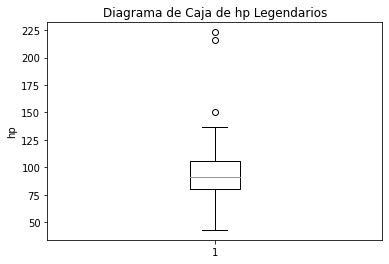

In [45]:
#hp Legendarios.
plt.boxplot(Legendarios['hp'])

plt.title('Diagrama de Caja de hp Legendarios')
plt.ylabel('hp')
plt.show()

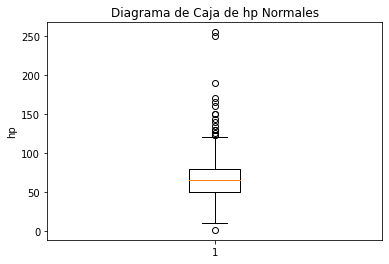

In [46]:
#hp Normales
plt.boxplot(Pokemones['hp'])

plt.title('Diagrama de Caja de hp Normales')
plt.ylabel('hp')
plt.show()

In [49]:
print("Los valores atipicos de hp en los pokemones legendarios son superiores de",  round(1.5*(Legendarios.hp.quantile(0.75)-Legendarios.hp.quantile(0.25))+Legendarios.hp.quantile(0.75), 2), "Puntos.")
print("Los valores atipicos de hp en los pokemones Normales son superiores de",  round(1.5*(Pokemones.hp.quantile(0.75)-Pokemones.hp.quantile(0.25))+Pokemones.hp.quantile(0.75), 2), "Puntos.")

Los valores atipicos de hp en los pokemones legendarios son superiores de 145.0 Puntos.
Los valores atipicos de hp en los pokemones Normales son superiores de 122.5 Puntos.


Observando nuestras dos graficas que comparan el hp de los pokemones legendarios y los pokemones normales notamos que los valores atipicos de los pokemones normales empiezan desde un valor menor que el de los legendarios, pero tambien vemos que el hp de dos pokemones normales llega a ser mayor que el de todos los pokemones legendarios, aca se visualiza nuestra interrogante, ¿por qué esos dos pokemones no son considerados legendarios?.